In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/'
#Dataset-Unicauca-Version2-87Atts.csv')#('/kaggle/input/ip-network-traffic-flows-labeled-with-87-apps/Dataset-Unicauca-Version2-87Atts.csv')

Mounted at /content/drive


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.5)
#model1=keras.Sequential()
#for layer in base_model.layers:
# layer.trainable=False
#for layer in base_model.layers[:-3]:
# model1.add(layer)

#model1.add(keras.layers.Flatten())
#model1.add(keras.layers.Dense(7, activation='softmax'))

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Dataset-Unicauca-Version2-87Atts.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

df =df.query("ProtocolName in ('FACEBOOK','GMAIL','YOUTUBE','SKYPE','WINDOWS_UPDATE','AMAZON')")
traffic_classifier_df=df.drop(['Flow.ID', 'Source.IP', 'Destination.IP',
                              'Timestamp','Flow.Bytes.s', 'Flow.Packets.s','Fwd.PSH.Flags',
                               'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags','Fwd.Packets.s',
                               'Bwd.Packets.s','Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes', 'Subflow.Bwd.Packets',
                               'Subflow.Bwd.Bytes','Init_Win_bytes_forward', 'Init_Win_bytes_backward',
                               'act_data_pkt_fwd','min_seg_size_forward','Label', 'ProtocolName',
                               'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Flow.IAT.Max', 'Flow.IAT.Min','Fwd.IAT.Max', 'Fwd.IAT.Min',
                               'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min','Bwd.IAT.Max', 'Bwd.IAT.Min','Active.Max', 'Active.Min',
                                'Idle.Max', 'Idle.Min','Fwd.Avg.Packets.Bulk',
                               'Fwd.Avg.Bulk.Rate','Bwd.Avg.Bytes.Bulk','Bwd.Avg.Packets.Bulk','Bwd.Avg.Bulk.Rate','Active.Mean','Active.Std',
                               'Idle.Mean','Idle.Std','Fwd.Avg.Bytes.Bulk','Down.Up.Ratio','ECE.Flag.Count','CWE.Flag.Count','URG.Flag.Count',
                               'FIN.Flag.Count','SYN.Flag.Count','RST.Flag.Count','PSH.Flag.Count','ACK.Flag.Count','Min.Packet.Length',
                               'Bwd.Header.Length', 'Max.Packet.Length',    'Packet.Length.Mean',   'Packet.Length.Std',    'Packet.Length.Variance',
                               'Average.Packet.Size',   'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size', 'Fwd.Header.Length.1',
                               'Flow.IAT.Mean', 'Flow.IAT.Std', 'Fwd.IAT.Total',    'Fwd.IAT.Mean', 'Fwd.IAT.Std',  'Bwd.IAT.Total',
                               'Bwd.IAT.Mean',  'Bwd.IAT.Std',  'Fwd.Header.Length','Bwd.Packet.Length.Std','Protocol'

                               ], axis = 1)

#print(list(traffic_classifier_df.columns))
traffic_classifier_df.head()

,Source.Port,Destination.Port,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Mean,L7Protocol
36,55980,3128,247289,15,0,1388,0.0,92.533333,112.519755,0.000000,124
37,37557,443,243047,21,17,922,9330.0,43.904762,93.559021,548.823529,124
38,37557,443,10022,1,1,0,0.0,0.000000,0.000000,0.000000,124
83,52680,3128,405528,7,33,669,17153.0,95.571429,114.309313,519.787879,124
84,44858,443,346773,8,3,443,2799.0,55.375000,103.118431,933.000000,124


In [ ]:
pd. set_option('display.max_rows', 500)
print(df['ProtocolName'].value_counts())

GOOGLE               959110
HTTP                 683734
HTTP_PROXY           623210
SSL                  404883
HTTP_CONNECT         317526
YOUTUBE              170781
AMAZON                86875
MICROSOFT             54710
GMAIL                 40260
WINDOWS_UPDATE        34471
SKYPE                 30657
FACEBOOK              29033
DROPBOX               25102
YAHOO                 21268
TWITTER               18259
CLOUDFLARE            14737
MSN                   14478
CONTENT_FLASH          8589
APPLE                  7615
OFFICE_365             5941
WHATSAPP               4593
INSTAGRAM              2415
WIKIPEDIA              2025
MS_ONE_DRIVE           1748
DNS                    1695
IP_ICMP                1631
NETFLIX                1560
APPLE_ITUNES           1287
SPOTIFY                1269
APPLE_ICLOUD           1200
EBAY                   1192
SSL_NO_CERT             856
GOOGLE_MAPS             807
EASYTAXI                705
TEAMVIEWER              527
HTTP_DOWNLOAD       

In [ ]:
traffic_classifier_df=traffic_classifier_df.fillna(0)
#scaler = MinMaxScaler()
#normalized_data = scaler.fit_transform(traffic_classifier_df)
#traffic_classifier_df = pd.DataFrame(normalized_data, columns=traffic_classifier_df.columns)
X, y = traffic_classifier_df.values[:, :-1], traffic_classifier_df.values[:, -1]
#X = X[:30000]
#y = y[:30000]
X=np.reshape(X,(X.shape[0],X.shape[1],1))
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [ ]:
import numpy as np
X_train.shape
#print(np.unique(y_train))

(235246, 10, 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 128)           512       
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           49280     
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 128)           49280     
                                                                 
 bidirectional (Bidirectiona  (None, 10, 256)          198144    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 10, 256)          296448    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 10, 256)           0

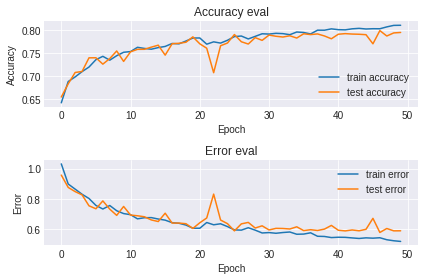

613/613 [==============================] - 4s 4ms/step
              precision    recall  f1-score   support

           0       0.92      0.80      0.85     11710
           1       0.70      0.44      0.54     16050
           2       0.77      0.91      0.83     68118
           3       0.72      0.48      0.58     12363
           4       0.85      0.78      0.81     13848
           5       0.85      0.85      0.85     34742

    accuracy                           0.79    156831
   macro avg       0.80      0.71      0.74    156831
weighted avg       0.79      0.79      0.79    156831



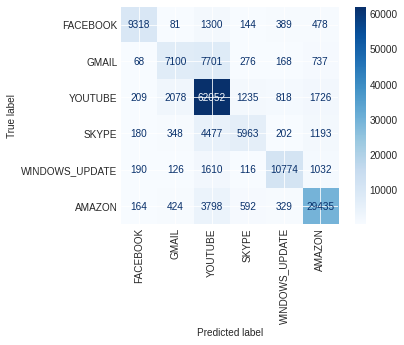

In [ ]:
from pandas import read_csv
import numpy as np
import math
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from keras import Model
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense, LSTM,Dropout
from keras.models import Sequential
from keras.metrics import mean_squared_error
from keras.utils.vis_utils import plot_model
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """
    plt.style.use('seaborn-darkgrid')
    fig, axs = plt.subplots(2)
    fig.tight_layout()

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].set_xlabel("Epoch")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
  # get train, validation, test splits
  X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

  model = keras.Sequential()
  model.add(keras.layers.Conv1D(128, kernel_size=3, padding="same", activation="tanh", input_shape=(X_train.shape[1],X_train.shape[2])))
  model.add(keras.layers.Conv1D(128, kernel_size=3, padding="same", activation="tanh"))
  model.add(keras.layers.Conv1D(128, kernel_size=3, padding="same", activation="tanh"))
  model.add(keras.layers.Bidirectional(keras.layers.GRU(128, activation="tanh", return_sequences=True)))
  model.add(keras.layers.Bidirectional(keras.layers.GRU(128, activation="tanh", return_sequences=True)))
  model.add(Dropout(0.5))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(6, activation='softmax'))

  opt = keras.optimizers.Adam(amsgrad=True)
  model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      optimizer=opt,
      metrics=['accuracy'])

  model.summary()

  plot_model(model,to_file='/content/drive/MyDrive/model/Traffic_Classifier_CNN_BiGRU.png', show_shapes=True,
             show_dtype=False,show_layer_names=True,rankdir="TB",expand_nested=True,dpi=96,layer_range=None,show_layer_activations=True)

  history = model.fit(
    X_train, y_train, validation_data=(X_validation, y_validation), batch_size=256, epochs=50
  )

  # plot accuracy/error for training and validation
  plot_history(history)

  # evaluate model on test set
  #test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
  #print('\nTest accuracy:', test_acc)

  y_pred1 = model.predict(X_test, batch_size=256, verbose=1)
  y_pred = np.argmax(y_pred1, axis=1)

  # Print f1, precision, and recall scores
  #print(precision_score(y_test, y_pred , average="macro"))
  #print(recall_score(y_test, y_pred , average="macro"))
  #print(f1_score(y_test, y_pred , average="macro"))

  labels = ['FACEBOOK','GMAIL','YOUTUBE','SKYPE','WINDOWS_UPDATE','AMAZON']
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap=plt.cm.Blues,xticks_rotation='vertical')

  print(classification_report(y_test, y_pred))

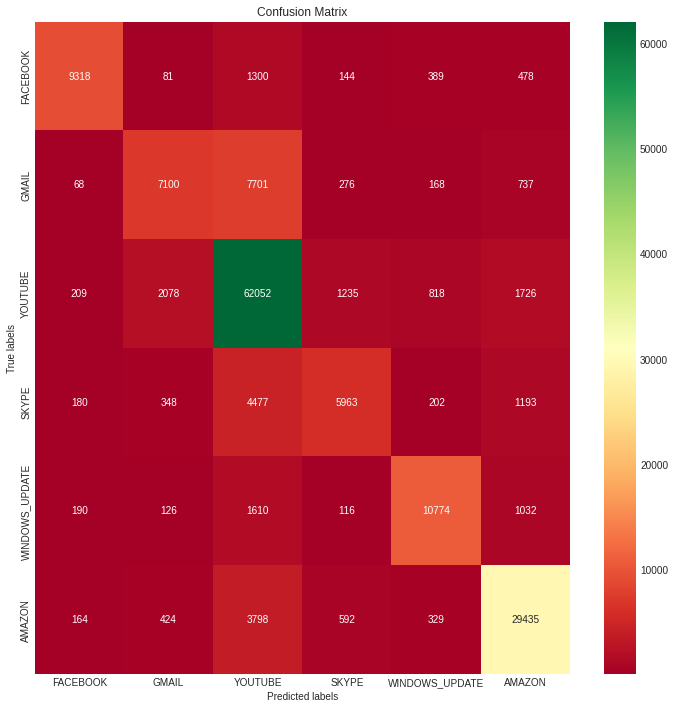

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='RdYlGn');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['FACEBOOK','GMAIL','YOUTUBE','SKYPE','WINDOWS_UPDATE','AMAZON']);
ax.yaxis.set_ticklabels(['FACEBOOK','GMAIL','YOUTUBE','SKYPE','WINDOWS_UPDATE','AMAZON']);

In [ ]:
from tensorflow.keras.models import load_model
#model.save('transfer_model_new.h5')
path = F"/content/drive/MyDrive/model/transfer_model_new.h5"
#model.save(path)
base_model=load_model(path)
base_model.layers

ROC AUC score: 0.8287037167220169


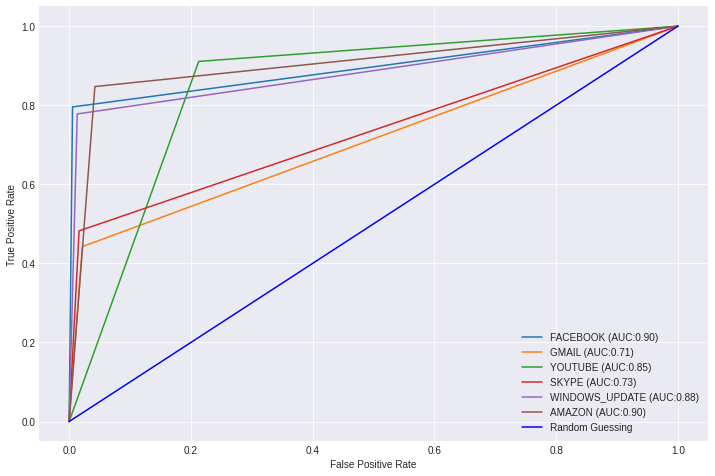

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['FACEBOOK','GMAIL','YOUTUBE','SKYPE','WINDOWS_UPDATE','AMAZON']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/UNSW-NB15.csv')

In [ ]:
print(df['service'].value_counts())

dns         121170
http         55858
ftp-data     37305
smtp         23588
ftp          16531
ssh          14636
pop3           206
ssl             20
snmp            14
radius           7
dhcp             7
irc              3
Name: service, dtype: int64


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

df =df.query("service in ('dns','http','ftp-data','smtp','ssh')")
df['service'] = le.fit_transform(df['service'])
traffic_classifier_df=df
traffic_classifier_df.head()

,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,service
0,1390,53,0.001055,132,164,31,29,0,0,500473.9375,0
1,1464,53,0.001119,146,178,31,29,0,0,521894.5313,0
2,3593,53,0.001209,132,164,31,29,0,0,436724.5625,0
3,49664,53,0.001169,146,178,31,29,0,0,499572.2500,0
4,2142,53,0.001134,132,164,31,29,0,0,465608.4688,0


In [ ]:
traffic_classifier_df=traffic_classifier_df.fillna(0)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(traffic_classifier_df)
traffic_classifier_df = pd.DataFrame(normalized_data, columns=traffic_classifier_df.columns)
X, y = traffic_classifier_df.values[:, :-1], traffic_classifier_df.values[:, -1]
X=np.reshape(X,(X.shape[0],X.shape[1],1))
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [ ]:
import numpy as np
X_train.shape
print(np.unique(y_train))

[0 1 2 3 4]


In [ ]:
from pandas import read_csv
import numpy as np
import math
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from keras import Model
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense, LSTM,Dropout
from keras.models import Sequential
from keras.metrics import mean_squared_error
from keras.utils.vis_utils import plot_model
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier

#gnb = GaussianNB()
#gnb.fit(X_train, y_train)
#y_pred = gnb.predict(X_test)
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)
#print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
#scores = cross_val_score(xgboost, X_train, y_train, cv = 10, scoring='accuracy')
#print('Cross-validation scores:{}'.format(scores))
#print('Average cross-validation score: {:.4f}'.format(scores.mean()))
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48353
           1       1.00      1.00      1.00     14920
           2       1.00      1.00      1.00     22550
           3       1.00      1.00      1.00      9319
           4       1.00      1.00      1.00      5881

    accuracy                           1.00    101023
   macro avg       1.00      1.00      1.00    101023
weighted avg       1.00      1.00      1.00    101023



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 128)           512       
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           49280     
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 128)           49280     
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                

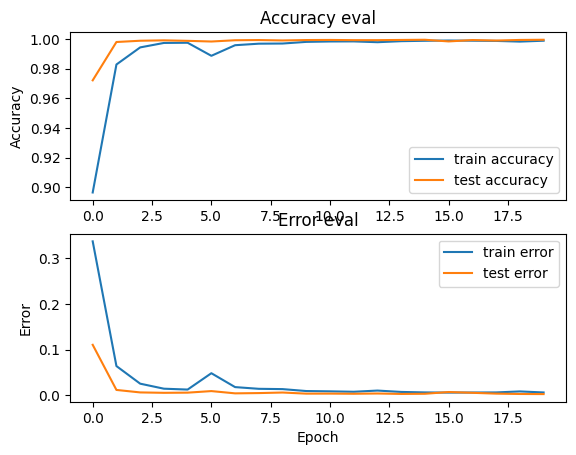

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()



#model = keras.Sequential()
input_shape = (X_train.shape[1], X_train.shape[2])
#model.add(keras.layers.LSTM(64, input_shape=input_shape, activation='tanh', return_sequences=True))
#model.add(keras.layers.LSTM(64, dropout = 0.4, activation='tanh'))
#model.add(keras.layers.Dense(64, activation='tanh'))
#model.add(keras.layers.Dropout(0.3))
#model.add(keras.layers.Dense(5, activation='softmax'))

model = keras.Sequential()

# 1st conv layer
model.add(keras.layers.Conv1D(128, kernel_size=3, padding="same", activation="tanh", input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(keras.layers.Conv1D(128, kernel_size=3, padding="same", activation="tanh"))
model.add(keras.layers.Conv1D(128, kernel_size=3, padding="same", activation="tanh"))

# flatten output and feed it into dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

# output layer
model.add(keras.layers.Dense(5, activation='softmax'))

optimiser = keras.optimizers.Adam(amsgrad=True)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model.summary()
X_train,X_validation,y_train,y_validation  = train_test_split(X_train,y_train,test_size=0.1)
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=256, epochs=20)
plot_history(history)



1579/1579 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48353
           1       1.00      1.00      1.00     14920
           2       1.00      1.00      1.00     22550
           3       1.00      1.00      1.00      9319
           4       1.00      1.00      1.00      5881

    accuracy                           1.00    101023
   macro avg       1.00      1.00      1.00    101023
weighted avg       1.00      1.00      1.00    101023



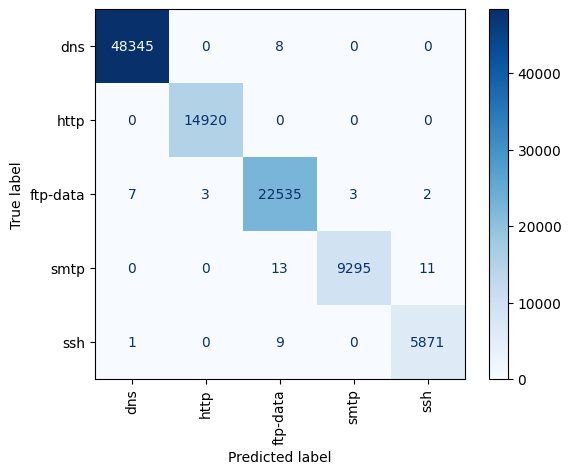

In [ ]:
y_pred1 = model.predict(X_test, batch_size=64, verbose=1)
y_pred = np.argmax(y_pred1, axis=1)

labels = ['dns','http','ftp-data','smtp','ssh']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues,xticks_rotation='vertical')

print(classification_report(y_test, y_pred))

In [ ]:
inputs = keras.Input(shape=(X_train.shape[1],X_train.shape[2]))
base_model(inputs, training=False)
# add new classifier layers
flat1 = keras.layers.Flatten()(base_model.layers[-3].output)
class1 = Dense(64, activation='tanh')(flat1)
output = Dense(5, activation='softmax')(class1)
# define new model
model = Model(inputs=base_model.inputs, outputs=output)
opt = keras.optimizers.Adam(amsgrad=True)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
     optimizer=opt,
     metrics=['accuracy'])
# summarize
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_input (InputLayer)   [(None, 10, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 10, 128)           512       
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           49280     
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 128)           49280     
                                                                 
 bidirectional (Bidirectiona  (None, 10, 256)          198144    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 10, 256)          296448    
 nal)                                                        

Epoch 1/10
1705/1705 [==============================] - 31s 12ms/step - loss: 0.5323 - accuracy: 0.8329 - val_loss: 0.5368 - val_accuracy: 0.8308
Epoch 2/10
1705/1705 [==============================] - 19s 11ms/step - loss: 0.4753 - accuracy: 0.8606 - val_loss: 0.6224 - val_accuracy: 0.8335
Epoch 3/10
1705/1705 [==============================] - 19s 11ms/step - loss: 0.4151 - accuracy: 0.8805 - val_loss: 0.7986 - val_accuracy: 0.7437
Epoch 4/10
1705/1705 [==============================] - 18s 11ms/step - loss: 0.4669 - accuracy: 0.8633 - val_loss: 0.2836 - val_accuracy: 0.9077
Epoch 5/10
1705/1705 [==============================] - 19s 11ms/step - loss: 0.3094 - accuracy: 0.9146 - val_loss: 0.4727 - val_accuracy: 0.8544
Epoch 6/10
1705/1705 [==============================] - 18s 11ms/step - loss: 0.1623 - accuracy: 0.9579 - val_loss: 0.2295 - val_accuracy: 0.9644
Epoch 7/10
1705/1705 [==============================] - 19s 11ms/step - loss: 0.1639 - accuracy: 0.9591 - val_loss: 0.2346 -

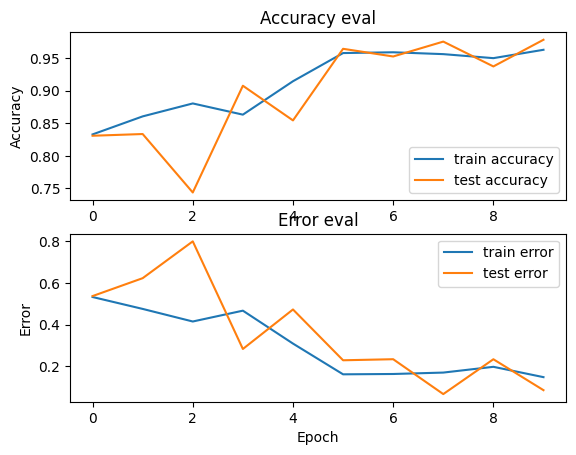

1579/1579 [==============================] - 7s 4ms/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     48353
           1       1.00      1.00      1.00     14920
           2       1.00      0.91      0.95     22550
           3       1.00      0.99      0.99      9319
           4       0.97      1.00      0.99      5881

    accuracy                           0.98    101023
   macro avg       0.99      0.98      0.98    101023
weighted avg       0.98      0.98      0.98    101023



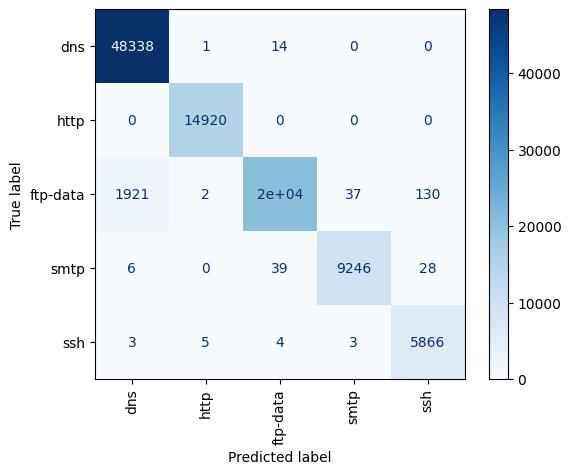

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

history = model.fit(
    X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=10
)

plot_history(history)

y_pred1 = model.predict(X_test, batch_size=64, verbose=1)
y_pred = np.argmax(y_pred1, axis=1)

labels = ['dns','http','ftp-data','smtp','ssh']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues,xticks_rotation='vertical')

print(classification_report(y_test, y_pred))

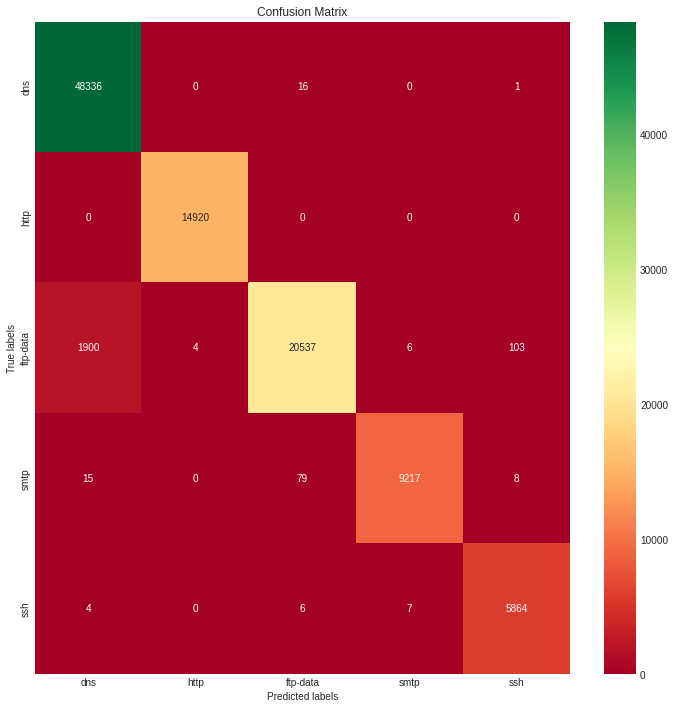

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='RdYlGn');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['dns','http','ftp-data','smtp','ssh']);
ax.yaxis.set_ticklabels(['dns','http','ftp-data','smtp','ssh']);

ROC AUC score: 0.9857457206984707


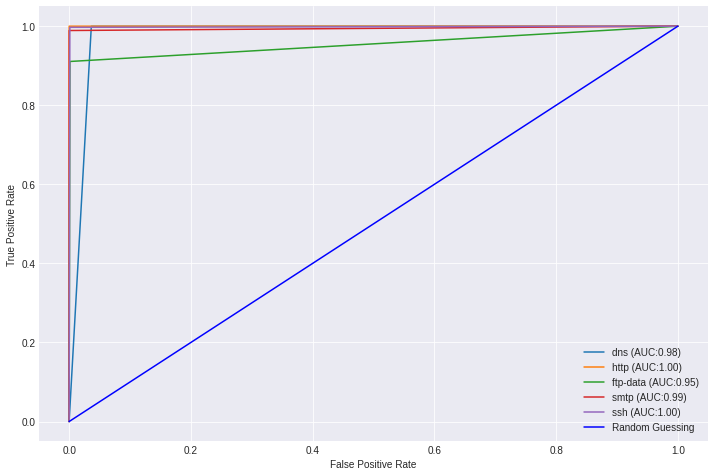

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['dns','http','ftp-data','smtp','ssh']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/ISCX_10cols.csv')

In [ ]:
#print(df.columns)
print(df['class1'].value_counts())

VOIP         5097
BROWSING     5000
FT           2950
CHAT         2086
P2P          1928
STREAMING     957
MAIL          740
Name: class1, dtype: int64


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

df =df.query("class1 in ('VOIP','BROWSING','FT','CHAT','P2P','STREAMING','MAIL')")
df['class1'] = le.fit_transform(df['class1'])
traffic_classifier_df=df
traffic_classifier_df.head()

,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,flowBytesPerSecond,class1
0,16,4,1564818,1549373,190205.2857,203290.4565,389822.3919,370323.7198,10.353612,4802.688438,1
1,18,4,1567554,1527893,165686.9773,186914.8462,317267.5487,304370.6513,11.580006,4340.186245,1
2,29,15,1270547,1079974,165865.1786,195302.1304,329473.1263,300492.5882,11.412022,4161.512416,1
3,19,8,2492050,2457286,239543.2500,276596.3889,612435.3042,628339.5735,8.034169,3918.666087,1
4,19,10,3094089,3093543,243766.5000,295954.7250,599721.7817,625632.7040,7.602514,2802.540152,1


In [ ]:
traffic_classifier_df=traffic_classifier_df.fillna(0)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(traffic_classifier_df)
traffic_classifier_df = pd.DataFrame(normalized_data, columns=traffic_classifier_df.columns)
X, y = traffic_classifier_df.values[:, :-1], traffic_classifier_df.values[:, -1]
X=np.reshape(X,(X.shape[0],X.shape[1],1))
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
import numpy as np
X_train.shape
print(np.unique(y_train))

[0 1 2 3 4 5 6]


In [ ]:
inputs = keras.Input(shape=(X_train.shape[1],X_train.shape[2]))
base_model(inputs, training=False)
# add new classifier layers
flat1 = keras.layers.Flatten()(base_model.layers[-3].output)
class1 = Dense(64, activation='relu')(flat1)
output = Dense(7, activation='softmax')(class1)
# define new model
model = Model(inputs=base_model.inputs, outputs=output)
opt = keras.optimizers.Adam(amsgrad=True)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
     optimizer=opt,
     metrics=['accuracy'])
# summarize
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_input (InputLayer)   [(None, 10, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 10, 128)           512       
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           49280     
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 128)           49280     
                                                                 
 bidirectional (Bidirectiona  (None, 10, 256)          198144    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 10, 256)          296448    
 nal)                                                      

Epoch 1/50
91/91 [==============================] - 1s 14ms/step - loss: 0.6513 - accuracy: 0.7608 - val_loss: 0.6039 - val_accuracy: 0.7856
Epoch 2/50
91/91 [==============================] - 1s 13ms/step - loss: 0.6436 - accuracy: 0.7624 - val_loss: 0.5990 - val_accuracy: 0.7786
Epoch 3/50
91/91 [==============================] - 2s 18ms/step - loss: 0.6161 - accuracy: 0.7702 - val_loss: 0.6062 - val_accuracy: 0.7772
Epoch 4/50
91/91 [==============================] - 3s 31ms/step - loss: 0.6199 - accuracy: 0.7677 - val_loss: 0.6090 - val_accuracy: 0.7703
Epoch 5/50
91/91 [==============================] - 2s 17ms/step - loss: 0.5927 - accuracy: 0.7782 - val_loss: 0.6078 - val_accuracy: 0.7828
Epoch 6/50
91/91 [==============================] - 1s 13ms/step - loss: 0.5730 - accuracy: 0.7832 - val_loss: 0.6269 - val_accuracy: 0.7772
Epoch 7/50
91/91 [==============================] - 1s 12ms/step - loss: 0.5697 - accuracy: 0.7877 - val_loss: 0.6182 - val_accuracy: 0.7779
Epoch 8/50
91

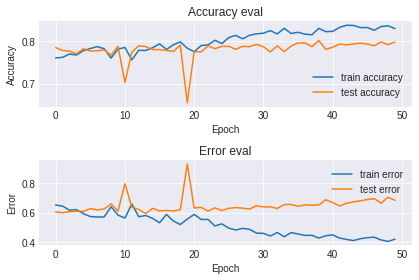

118/118 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1978
           1       0.65      0.42      0.51       825
           2       0.69      0.56      0.62      1195
           3       0.68      0.72      0.70       309
           4       0.55      0.84      0.67       772
           5       0.80      0.75      0.78       392
           6       0.98      0.98      0.98      2033

    accuracy                           0.78      7504
   macro avg       0.74      0.73      0.73      7504
weighted avg       0.79      0.78      0.78      7504



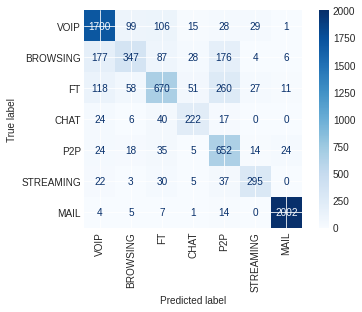

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

history = model.fit(
    X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=50
)

plot_history(history)

y_pred1 = model.predict(X_test, batch_size=64, verbose=1)
y_pred = np.argmax(y_pred1, axis=1)

labels = ['VOIP','BROWSING','FT','CHAT','P2P','STREAMING','MAIL']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues,xticks_rotation='vertical')

print(classification_report(y_test, y_pred))

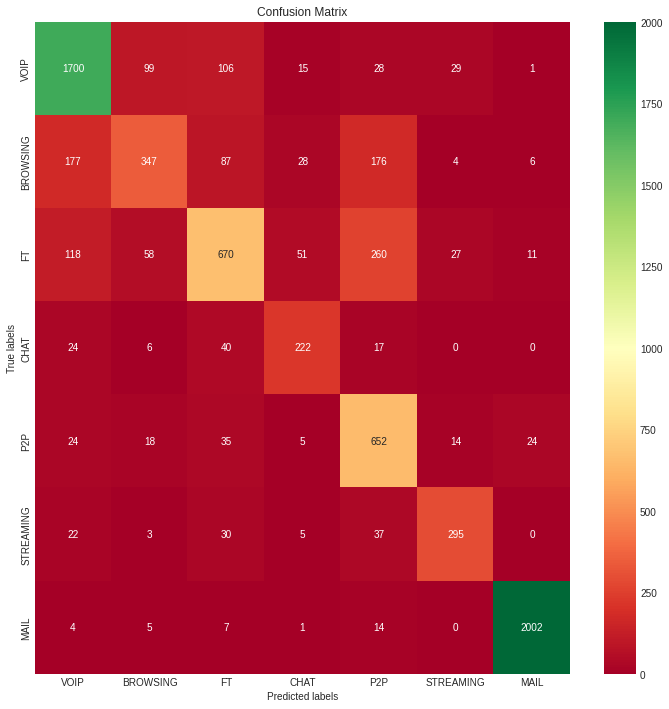

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='RdYlGn');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['VOIP','BROWSING','FT','CHAT','P2P','STREAMING','MAIL']);
ax.yaxis.set_ticklabels(['VOIP','BROWSING','FT','CHAT','P2P','STREAMING','MAIL']);

ROC AUC score: 0.8489943556527318


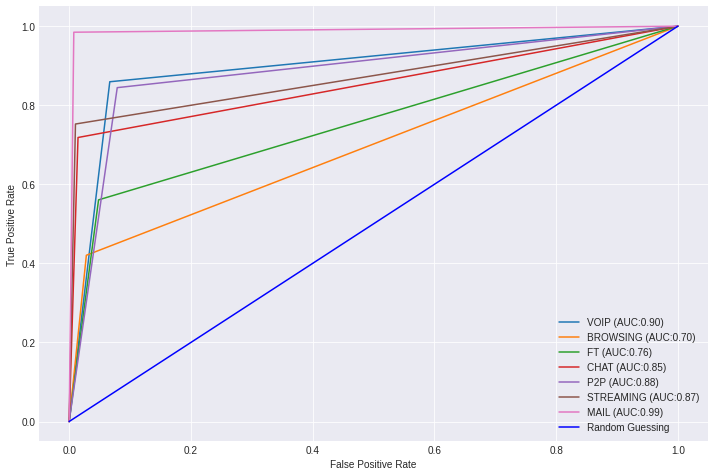

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['VOIP','BROWSING','FT','CHAT','P2P','STREAMING','MAIL']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()